## 0) EDA

This notebook presents a simple exploratory data analysis (EDA) of the dataset used in the project. Of the two companies considered we downloaded (through the `main.py` file) the following data:
- Income statement: the income statement of the company, which includes revenues, expenses, and profits over a specific period.
- Balance sheet: the balance sheet of the company, which provides a snapshot of its assets, liabilities, and equity at a specific point in time.
- Historical stock prices: the historical stock prices of the company, which includes daily opening and closing prices, trading volume, and other relevant information.


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Importing the datasets

walmart_df = pd.read_csv(r"Dataset\wmt_historical_data.csv")
stellantis_df = pd.read_csv("Dataset\stla_historical_data.csv")

def clean_dataframe(df):
    """
    Cleans the input DataFrame by performing the following operations:
    - Converts the 'Close' column to a float after removing commas.
    - Converts the 'Date' column to datetime format.
    - Sorts the DataFrame by the 'Date' column in ascending order.
    - Calculates the percentage change in the 'Close' column and adds it as a new column named 'Return'.
    """

    print(f"Initial DataFrame shape: {df.shape}")  
    # Ensure 'Close' is treated as a string and handle missing values
    df['Close'] = df['Close'].astype(str).str.replace(',', '', regex=False)
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')  # Convert to float, coercing errors to NaN
    df.dropna(subset=['Close'], inplace=True)  # Drop rows where 'Close' is NaN

    # Process the 'Date' column
    df['Date'] = pd.to_datetime(df['Date'].str[:-6], errors='coerce')  # Handle invalid dates
    df.dropna(subset=['Date'], inplace=True)  # Drop rows where 'Date' is NaT

    # Sort by date and calculate returns
    df.sort_values('Date', inplace=True)
    df['Return'] = df['Close'].pct_change()
    return df

walmart_df = clean_dataframe(walmart_df)
stellantis_df = clean_dataframe(stellantis_df)


Initial DataFrame shape: (60, 8)
Initial DataFrame shape: (60, 8)


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\allam\AppData\Local\Temp\ipykernel_35520\740035676.py:4: SyntaxWarning: invalid escape sequence '\s'
  stellantis_df = pd.read_csv("Dataset\stla_historical_data.csv")


In [4]:
# Displaying relevant statistics

walmart_expected_return = walmart_df['Return'].mean()
stellantis_expected_return = stellantis_df['Return'].mean()
walmart_std_dev = walmart_df['Return'].std()
stellantis_std_dev = stellantis_df['Return'].std()

print(f"Walmart Expected Return: {walmart_expected_return:.4f}")
print(f"Stellantis Expected Return: {stellantis_expected_return:.4f}")
print(f"Walmart Standard Deviation: {walmart_std_dev:.4f}")
print(f"Stellantis Standard Deviation: {stellantis_std_dev:.4f}")

Walmart Expected Return: 0.0172
Stellantis Expected Return: 0.0149
Walmart Standard Deviation: 0.0584
Stellantis Standard Deviation: 0.1211


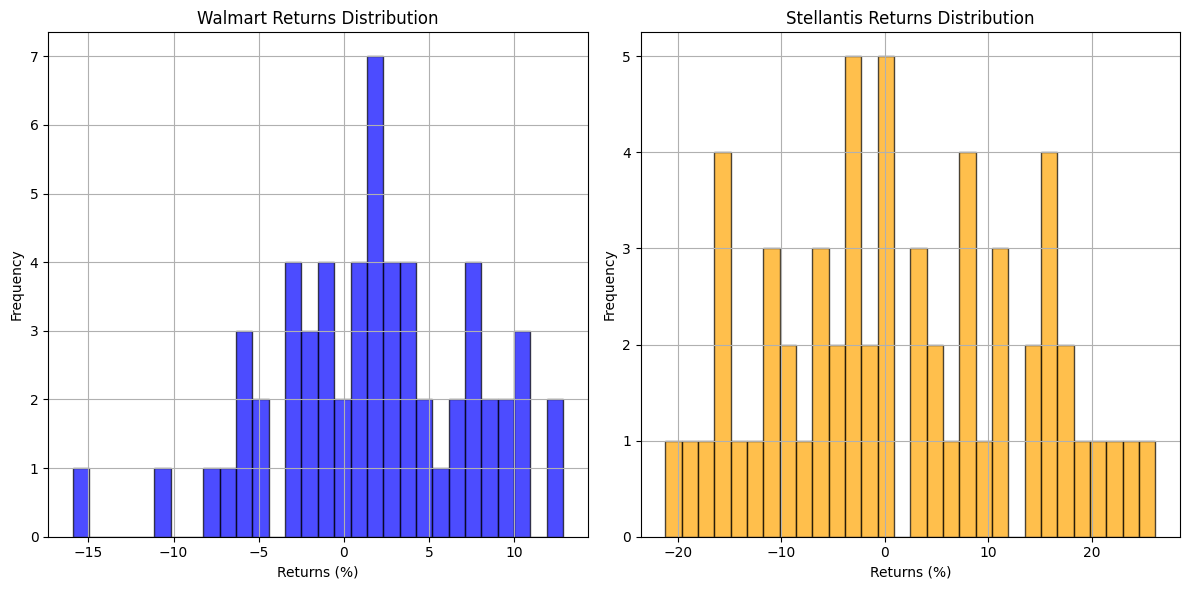

In [5]:
# Plotting the histograms of the returns with bin borders

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(walmart_df['Return']*100, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Walmart Returns Distribution')
plt.xlabel('Returns (%)')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(1, 2, 2)
plt.hist(stellantis_df['Return']*100, bins=30, color='orange', alpha=0.7, edgecolor='black')
plt.title('Stellantis Returns Distribution')
plt.xlabel('Returns (%)')
plt.ylabel('Frequency')
plt.grid()

plt.tight_layout()
plt.show()

In [6]:
# Compute yearly returns
yearly_returns= pd.DataFrame()


# Compute the percentage change from the first to the last date of each year for Walmart
yearly_returns.loc["Walmart", '2021'] = (walmart_df.loc[walmart_df['Date'] == '2021-05-01', 'Close'].values[0] - walmart_df.loc[walmart_df['Date'] == '2020-05-01', 'Close'].values[0]) / walmart_df.loc[walmart_df['Date'] == '2020-05-01', 'Close'].values[0]
yearly_returns.loc["Walmart", '2022'] = (walmart_df.loc[walmart_df['Date'] == '2022-05-01', 'Close'].values[0] - walmart_df.loc[walmart_df['Date'] == '2021-05-01', 'Close'].values[0]) / walmart_df.loc[walmart_df['Date'] == '2021-05-01', 'Close'].values[0]
yearly_returns.loc["Walmart", '2023'] = (walmart_df.loc[walmart_df['Date'] == '2023-05-01', 'Close'].values[0] - walmart_df.loc[walmart_df['Date'] == '2022-05-01', 'Close'].values[0]) / walmart_df.loc[walmart_df['Date'] == '2022-05-01', 'Close'].values[0]
yearly_returns.loc["Walmart", '2024'] = (walmart_df.loc[walmart_df['Date'] == '2024-05-01', 'Close'].values[0] - walmart_df.loc[walmart_df['Date'] == '2023-05-01', 'Close'].values[0]) / walmart_df.loc[walmart_df['Date'] == '2023-05-01', 'Close'].values[0]
yearly_returns.loc["Walmart", '2025'] = (walmart_df.loc[walmart_df['Date'] == '2025-04-01', 'Close'].values[0] - walmart_df.loc[walmart_df['Date'] == '2024-05-01', 'Close'].values[0]) / walmart_df.loc[walmart_df['Date'] == '2024-05-01', 'Close'].values[0]

# Compute the percentage change from the first to the last date of each year for Stellantis
yearly_returns.loc["Stellantis", '2021'] = (stellantis_df.loc[stellantis_df['Date'] == '2021-05-01', 'Close'].values[0] - stellantis_df.loc[stellantis_df['Date'] == '2020-05-01', 'Close'].values[0]) / stellantis_df.loc[stellantis_df['Date'] == '2020-05-01', 'Close'].values[0]
yearly_returns.loc["Stellantis", '2022'] = (stellantis_df.loc[stellantis_df['Date'] == '2022-05-01', 'Close'].values[0] - stellantis_df.loc[stellantis_df['Date'] == '2021-05-01', 'Close'].values[0]) / stellantis_df.loc[stellantis_df['Date'] == '2021-05-01', 'Close'].values[0]
yearly_returns.loc["Stellantis", '2023'] = (stellantis_df.loc[stellantis_df['Date'] == '2023-05-01', 'Close'].values[0] - stellantis_df.loc[stellantis_df['Date'] == '2022-05-01', 'Close'].values[0]) / stellantis_df.loc[stellantis_df['Date'] == '2022-05-01', 'Close'].values[0]
yearly_returns.loc["Stellantis", '2024'] = (stellantis_df.loc[stellantis_df['Date'] == '2024-05-01', 'Close'].values[0] - stellantis_df.loc[stellantis_df['Date'] == '2023-05-01', 'Close'].values[0]) / stellantis_df.loc[stellantis_df['Date'] == '2023-05-01', 'Close'].values[0]
yearly_returns.loc["Stellantis", '2025'] = (stellantis_df.loc[stellantis_df['Date'] == '2025-04-01', 'Close'].values[0] - stellantis_df.loc[stellantis_df['Date'] == '2024-05-01', 'Close'].values[0]) / stellantis_df.loc[stellantis_df['Date'] == '2024-05-01', 'Close'].values[0]

Walmart Yearly Expected Return: 0.2153
Stellantis Yearly Expected Return: 0.3038
Walmart Yearly Standard Deviation: 0.2120
Stellantis Yearly Standard Deviation: 0.8343


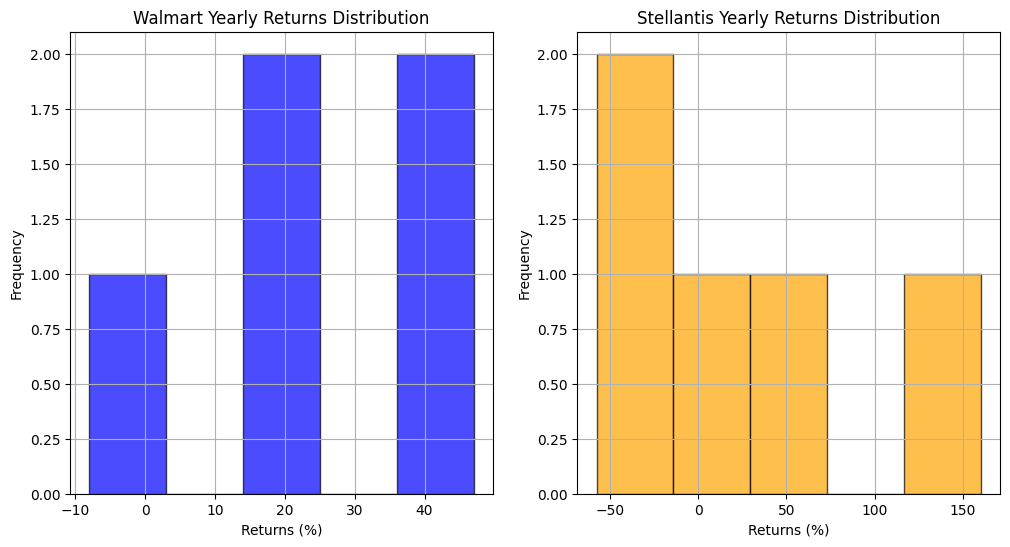

In [7]:
# Compute relevant statistics
walmart_yearly_expected_return = yearly_returns.loc["Walmart"].mean()
stellantis_yearly_expected_return = yearly_returns.loc["Stellantis"].mean()
walmart_yearly_std_dev = yearly_returns.loc["Walmart"].std()
stellantis_yearly_std_dev = yearly_returns.loc["Stellantis"].std()

# Displaying relevant statistics
print(f"Walmart Yearly Expected Return: {walmart_yearly_expected_return:.4f}")
print(f"Stellantis Yearly Expected Return: {stellantis_yearly_expected_return:.4f}")
print(f"Walmart Yearly Standard Deviation: {walmart_yearly_std_dev:.4f}")
print(f"Stellantis Yearly Standard Deviation: {stellantis_yearly_std_dev:.4f}")

# Plotting the histograms of the yearly returns with bin borders
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(yearly_returns.loc["Walmart"]*100, bins=5, color='blue', alpha=0.7, edgecolor='black')
plt.title('Walmart Yearly Returns Distribution')
plt.xlabel('Returns (%)')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(1, 2, 2)
plt.hist(yearly_returns.loc["Stellantis"]*100, bins=5, color='orange', alpha=0.7, edgecolor='black')
plt.title('Stellantis Yearly Returns Distribution')
plt.xlabel('Returns (%)')
plt.ylabel('Frequency')
plt.grid()
